In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [13]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import time
import pickle
import random
import h5py


import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

from rebergrammar_generator import *
from experimentor import Experimentor
from ufuncs import full_pickle, unpickle, compress_pickle, decompress_pickle

os.getcwd()
# np.set_printoptions(threshold=sys.maxsize)

'/home/thabib/Documents/Personal/Master_Thesis/1_HTMImplementation'

# Run Experiment (SRG/ERG learning)

### Param Settings (NOTE: Define `trial` carefully, for consistent saving of data later)

In [14]:
# Network params
M = 8
N = 175
k = 25

perm_decrement = 0.01 # p-
perm_increment = 2*perm_decrement # p+
perm_decay = 0.15*perm_decrement # p--
perm_boost = 0.1*perm_decrement # p++

# Cell params
dendrites_percell = 32
connSynapses_perdend = 32 # not functional, at the moment
nmda_threshold = 20
permanence_threshold = 0.40
init_permanence = 0.25
activity_horizon = None
activity_threshold = None

# Task params
do_ERG = False
nof_strings = 2000

trial = 'trial_2_'


dict_params = {
    'M': M,
    'N': N,
    'k': k,
    'dendrites_percell': dendrites_percell,
    'connSynapses_perdend': connSynapses_perdend,
    'nmda_th': nmda_threshold,
    'perm_th': permanence_threshold,
    'perm_init': init_permanence,
    'activity_horizon': activity_horizon,
    'activity_th': activity_threshold,
    'perm_decrement': perm_decrement,
    'perm_increment': perm_increment,
    'perm_decay': perm_decay,
    'perm_boost': perm_boost,
    'do_ERG': do_ERG,
    'nof_strings': nof_strings
}

### Experiment Initializer and Launcher

In [ ]:
start = time.time()

exp = Experimentor(M=M, N=N, k=k, 
                   n_dendrites=dendrites_percell, 
                   n_synapses=connSynapses_perdend, 
                   nmda_th=nmda_threshold, 
                   perm_th=permanence_threshold, 
                   perm_init=init_permanence, 
                   perm_decrement=perm_decrement, 
                   perm_increment=perm_increment, 
                   perm_decay=perm_decay, 
                   perm_boost=perm_boost,
                   activity_horizon=activity_horizon, 
                   activity_th=activity_threshold,
                   do_ERG=do_ERG, 
                   nof_strings=nof_strings)


dict_results = exp.run_experiment()

print(time.time()-start)

# 3606 secs for 1000 strings
# 19374 secs for 5000 strings
# 7845 secs for 2000 strings

# sys.getsizeof(dict_results['results'])

#### Writing Files

In [ ]:
if do_ERG:
    exp_filename = trial+'ERG_'+str(nof_strings)
else:
    exp_filename = trial+'SRG_'+str(nof_strings)


# USING PICKLE
filename = exp_filename+'_chars_to_minicols'
full_pickle(filename, dict_results['chars_to_minicols'])
filename = exp_filename+'_in_strings_oh'
full_pickle(filename, dict_results['in_strings_onehot'])
filename = exp_filename+'_out_strings_oh'
full_pickle(filename, dict_results['out_strings_onehot'])
filename = exp_filename+'_exp_params'
full_pickle(filename, dict_params)

filename = exp_filename+'_results'
compress_pickle(filename, dict_results['results'])


# Experiments with Reber Grammar Generation

In [6]:
rg = Reber_Grammar(175, 25)

In [7]:
rg.df_CharsToMinicols

,A,T,S,X,P,V,Z
0,5,0,9,2,1,11,3
1,8,21,14,13,7,19,4
2,17,24,18,16,12,22,6
3,31,32,27,23,25,26,10
4,33,40,30,37,34,35,15
5,38,53,51,44,36,41,20
6,42,59,61,47,39,46,28
7,45,63,70,56,43,57,29
8,48,64,77,69,54,88,55
9,49,65,81,78,58,91,60


In [8]:
rg.generateSequences()
# ATSXPVZ

(['A', 'T', 'X', 'X', 'V', 'T', 'P', 'V', 'Z'],
 [('T', 'P'),
  ('S', 'X'),
  ('V', 'X'),
  'V',
  ('T', 'P', 'S'),
  ('T', 'P', 'S'),
  ('V', 'X'),
  'Z'])

In [125]:
rg.get_one_srg()

([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 1., 0., 1., 0.]),
  array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 

In [24]:
rg_inout = rg.get_n_srg(5)

In [27]:
type(rg_inout[0][0])

numpy.ndarray

In [28]:
list_in_strings = [rg_inout[i][0] for i in range(5)]
list_out_strings = [rg_inout[i][1] for i in range(5)]

In [34]:
in_strings_alpha = []
for string_oh in list_in_strings:
    string_alpha = rg.OnehotToWord(string_oh)
    in_strings_alpha.append(string_alpha)
    
in_strings_alpha

['ATXXVTPXVSZ', 'APVPVZ', 'APVTSZ', 'APVPXVSZ', 'ATXXVPXVPVZ']

In [42]:
list_in_strings[3][5]

array([1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1.])

In [82]:
rg.in_grammar(rg.OnehotToWord(rg.get_n_srg(5)[3][0]))

True

In [31]:
a = rg.get_n_srg(1000)

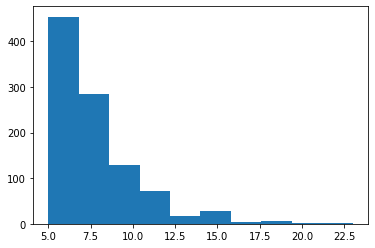

In [33]:
rg.hist_len_rg(a)

In [17]:
c=0
for i in len_erg_examples:
    if i>20:
        c+=1
c    

96

In [126]:
a = [(1,2),(2,2),(3,1)]
b = [a[i][0] for i in range(len(a))]
print(b)

[1, 2, 3]


# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::ROUGH::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Experimenting with feathers

In [14]:
import pyarrow.parquet as pq
import pyarrow as pa


arr = np.random.randn(10)
dic = {'T': [3,[9,0,24]], 'H': [[16,0],11], 'string': ['Taher', 'hussain']}
df = pd.DataFrame(dic)
df

,T,H,string
0,3,"[16, 0]",Taher
1,"[9, 0, 24]",11,hussain


In [15]:
table = pa.Table.from_pandas(df)

ArrowInvalid: ('cannot mix list and non-list, non-null values', 'Conversion failed for column T with type object')

## Experimenting with hdf5 

In [3]:
import ast 

arr = np.random.randn(10)
dic = {'T': [3,[9,0,24]], 'H': [[16,0],11], 'string': ['Taher', 'hussain']}
#df = pd.DataFrame(columns=['Name', 'Birth'])
df = pd.DataFrame(dic)
#display(np.array(df))
#dic = np.array(dic).reshape(1,-1)
df

,T,H,string
0,3,"[16, 0]",Taher
1,"[9, 0, 24]",11,hussain


In [4]:
df = pd.DataFrame(np.array(df))
df.columns = dic.keys()
np.array(df)

array([[3, list([16, 0]), 'Taher'],
       [list([9, 0, 24]), 11, 'hussain']], dtype=object)

In [6]:
with h5py.File('SRG_100str.hdf5', 'a') as f:
    g1 = f.create_group('trial_4')
    g1.create_dataset("df_results", data=np.array(df), dtype=h5py.string_dtype(encoding='utf-8'), 
                      compression="gzip", compression_opts=5)
    g1.create_dataset("dict_results", data=dic, dtype=h5py.string_dtype(encoding='utf-8'))
    g1.create_dataset("numpy_array", data=arr, 
                      compression="gzip", compression_opts=5)

In [7]:
with h5py.File('SRG_100str.hdf5', 'r') as f:
    
    groups = list(f.keys())
    
    df_ = f[str(groups[2])+'/df_results'][()]
    dic_ = f[str(groups[2])+'/dict_results'][()]
    arr_ = f[str(groups[2])+'/numpy_array'][()]

In [8]:
display(df_)
display(dic_)
display(arr_)

array([['3', '[16, 0]', 'Taher'],
       ['[9, 0, 24]', '11', 'hussain']], dtype=object)

"{'T': [3, [9, 0, 24]], 'H': [[16, 0], 11], 'string': ['Taher', 'hussain']}"

array([ 0.39903571, -1.13637657, -0.31234864, -0.46016904,  0.75840975,
        0.83245533,  0.05848878,  0.20081061,  0.66599588, -0.10947545])

In [9]:
df_ = pd.DataFrame(df_)
df_.columns = ['Tah', 'Hs', 'string']
df_.set_index('string', inplace=True)
display(df_)
display(ast.literal_eval(dic_))
display(arr_)

,Tah,Hs
string,,
Taher,3,"[16, 0]"
hussain,"[9, 0, 24]",11


{'T': [3, [9, 0, 24]], 'H': [[16, 0], 11], 'string': ['Taher', 'hussain']}

array([ 0.39903571, -1.13637657, -0.31234864, -0.46016904,  0.75840975,
        0.83245533,  0.05848878,  0.20081061,  0.66599588, -0.10947545])

In [55]:
pd.util.testing.rands_array(10, size=5)

/home/thabib/anaconda3/envs/tahresearch/lib/python3.8/site-packages/pandas/util/__init__.py:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


array(['fQsDh8piZM', 'GYL9hNuiRt', 'EpxSj4EbeZ', '6IYiKOSa3Y',
       'x2mEbH3JMd'], dtype=object)

## Calculation of Probability for a False Match of SDRs

In [6]:
from scipy.special import comb as ncr
    
def false_match_prob(a,n,s,th):
    summ = 0
    for i in range(th, s+1):
        summ += ncr(s,i, exact=True)*ncr(n-s,a-i, exact=True)
    
    prob = summ/ncr(n,a, exact=True)
    return prob

a = 25 # value of 'k'
n = 1400 # total cells in network
s = 100 # number of connected synapses on a dendritic segment
th = 20  # NMDA threshold 
        
false_match_prob(a,n,s,th)

7.141747382571475e-20

In [94]:
chars='TSXPV#'
emb_chars = 'TP'

graph = [[(1,5),('T','P')] , [(1,2),('S','X')], \
           [(3,5),('V','X')], [(6,),('#')], \
           [(4,2,3),('T','P','S')], [(4,),('V')] ]


# TO GENERATE SEQUENCES OF SRG
def generateSequences(minLength=5):
    """
    Returns a tuple with
    first entry: as array of chars generated from SRG
    second entry: as array of next possible transitions from each char in the first entry
    """
    while True:
        node = 0
        inchars = []
        outchars = []    
        while node != 6:
            transitions = graph[node]
            i = np.random.randint(0, len(transitions[0]))
            inchars.append(transitions[1][i])
            outchars.append(transitions[1])
            node = transitions[0][i]
        if len(inchars) > minLength:  
            return inchars, outchars
        
        
# TO GENERATE ONE-HOT ENCODINGS OF THE OUTPUT ARRAYS OF 'generateSequences()' function
def get_one_srg(minLength=5):
    inchars, outchars = generateSequences(minLength)
    inseq = []
    outseq= []
    for i,o in zip(inchars, outchars): 
        inpt = np.zeros(6)
        inpt[chars.find(i)] = 1.     
        outpt = np.zeros(6)
        for oo in o:
            outpt[chars.find(oo)] = 1.
        inseq.append(inpt)
        outseq.append(outpt)
    return inseq, outseq


# TO CONVERT BACK INTO SYMBOLS FROM THE ONE-HOT ENCODINGS
def OnehotToWord(sequence):
    """
    converts a sequence (one-hot) in a reber string
    """
    reberString = ''
    for s in sequence:
        index = np.where(s==1.0)[0][0]
        reberString += chars[index]
    reberString+='#'
    return reberString


def get_n_srg(n, minLength=5):
    examples = []
    for i in range(n):
        examples.append(get_one_srg(minLength))
    return examples



# ____________________________________For ERG strings__________________________________________#


def get_char_onehot(char):
    char_oh = np.zeros(6)
    if chars.find(char) == -1:
        print('Character NOT in Grammar')
        return
    else:
        char_oh[chars.find(char)] = 1.
    return char_oh 


def get_one_erg(minLength=5):
    
    simple_in, simple_out = get_one_srg()
    emb_in = simple_in[:]
    emb_out = simple_out[:]
    
    emb_char = emb_chars[np.random.randint(0, len(emb_chars))]
    emb_char_oh = get_char_onehot(emb_char)
    
    emb_in[1:1] = [emb_char_oh]
    emb_in.insert(len(emb_in), emb_char_oh)
    print('Embedded INPUT string:', OnehotToWord(emb_in))
    
    emb_out[1:1] = [simple_out[0]]
    emb_out.insert(len(emb_out)-1, get_char_onehot(emb_char))

    return emb_in, emb_out


def get_n_erg(n, minLength=5):
    examples = []
    for i in range(n):
        examples.append(get_one_erg(minLength))
    return examples


def in_grammar(word):
    node = 0    
    for c in word[1:]:
        transitions = graph[node]
        try:
            node = transitions[0][transitions[1].index(c)]
        except ValueError: # using exceptions for flow control in python is common
            return False
    return True        

In [ ]:
in_seq, out_seq = get_one_embedded_example(minLength=5)

print('Input sequence starting at char index 0 until the second to the last:\n')
print(in_seq)
print('-----------------------------------')
print('Input sequence as character:')
print(sequenceToWord(in_seq))
print('-----------------------------------')
print('Target sequence starting at char index 1 until the last')
print(sequenceToWord(out_seq))
print('-----------------------------------')
print('Validate a string:')
### Append 'E' to input sequence as char at last index is ommited
print(in_grammar(sequenceToWord(in_seq)+'E'))

In [ ]:
print(chars)

simple_in, simple_out = get_one_example()
print('\nSimple INPUT string (one-hot):', simple_in)
# print(o)

emb_char = emb_chars[np.random.randint(0, len(emb_chars))]
print('\nThis is embedded char:', emb_char)

oh_emb_char = get_char_one_hot(emb_char)
# print('\nThis is embedded chars one-hot encoding:', oh_emb_char)

emb_in = simple_in[:]
# print('\nString before embedding:', emb_in)
emb_in[1:1] = [oh_emb_char]
# print('\nString after front embedding:', emb_in)
emb_in.insert(len(emb_in), oh_emb_char)
# print('\nString after end embedding:', emb_in)
print('\nEmbedded INPUT string:', sequenceToWord(emb_in))

print('\n\n\n Simple OUTPUT string (one-hot):', simple_out)
print('\n Length of Simple OUTPUT string: ', len(simple_out))
emb_out = simple_out[:]
emb_out[1:1] = [simple_out[0]]
emb_out.insert(len(emb_out)-1, simple_out[0])
print('\nEmbedded OUTPUT string (one-hot):', emb_out)
print('\n Length of Embedded OUTPUT string: ', len(emb_out))

In [17]:
df = pd.DataFrame(columns=('string', 'states', 'preds'))
df.loc[0] = ['Taher', np.zeros([3,3]), np.array([])]
df.loc[1] = ['Taher_', np.zeros([2,2]), np.array([])]

In [20]:
df['string']

0     Taher
1    Taher_
Name: string, dtype: object

In [4]:
from rebergrammar_generator import *
from experimentor import Experimentor

# Network params
M = 8
N = 175
k = 25

perm_decrement = 0.05 # p-
perm_increment = 2*perm_decrement # p+
perm_decay = 0.2*perm_decrement # p--
perm_boost = 0.1*perm_decrement # p++

# Cell params
dendrites_percell = 32
connSynapses_perdend = 32 # not functional, at the moment
nmda_threshold = 20
permanence_threshold = 0.40
init_permanence = 0.25
activity_horizon = None
activity_threshold = None

# Task params
do_ERG = False
nof_strings = 5000

In [7]:
exp = Experimentor(M=M, N=N, k=k, n_dendrites=dendrites_percell, n_synapses=connSynapses_perdend, 
                   nmda_th=nmda_threshold, perm_th=permanence_threshold, perm_init=init_permanence, 
                   perm_decrement=perm_decrement, perm_increment=perm_increment, 
                   perm_decay=perm_decay, perm_boost=perm_boost,
                   activity_horizon=activity_horizon, activity_th=activity_threshold,
                   do_ERG=do_ERG, nof_strings=nof_strings)

In [8]:
len(np.unique(exp.in_strings_alpha))

369